Home Credit Default Risk - Exploratory Data Analysis
This notebook is used to explore the dataset for the Home Credit Default Risk competition, to understand the data structure, distribution, and feature relationships.

1. Project Background
Many people struggle to get loans due to a lack of or no credit history. These individuals are often taken advantage of by untrustworthy lenders. The Home Credit Group is dedicated to expanding financial inclusion for the unbanked population by providing a positive and safe lending experience.

Objective: Use alternative data to predict a client's repayment ability. Evaluation Metric: AUC (Area Under the ROC Curve)

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
# import warnings
# warnings.filterwarnings('ignore')
# adjust system path to include parent directory for module imports
import sys
sys.path.append('../')

from src.data.data_loader import HomeCreditDataLoader, reduce_memory_usage


In [2]:
from src.utils.visualization import DataVisualizer, plot_missing_values, plot_data_overview

## 2. Data loading

In [3]:
# data loader instance
data_loader = HomeCreditDataLoader(data_path='../data/raw')

# load all data
print("Loading datasets...")
datasets = data_loader.load_all_data()

# display basic info of each dataset
data_loader.get_data_info()

Loading datasets...
Loading all data...
Loading application data...
 check train shape : (307511, 122)
 check test shape : (48744, 121)
Loading bureau data...
 check bureau shape : (1716428, 17)
 check bureau_balance shape : (27299925, 3)
Loading previous application data...
 check previous_app shape : (1670214, 37)
Loading POS and cash loan data...
 check pos_cash shape : (10001358, 8)
Loading credit card data...
 check credit_card shape : (3840312, 23)
Loading installments data...
 check installments shape : (13605401, 8)
len of datasets : 8 datasets loaded.

=== Dataset Information ===

application_train:
  Shape: (307511, 122)
  Memory Usage: 536.69 MB
  Missing Values: 9152465

application_test:
  Shape: (48744, 121)
  Memory Usage: 84.74 MB
  Missing Values: 1404419

bureau:
  Shape: (1716428, 17)
  Memory Usage: 512.11 MB
  Missing Values: 3939947

bureau_balance:
  Shape: (27299925, 3)
  Memory Usage: 1926.61 MB
  Missing Values: 0

previous_application:
  Shape: (1670214, 37)


## 3. Main application form data exploration

In [4]:
# Focus on application_train and application_test datasets
train_df = datasets['application_train']
test_df = datasets['application_test']

print(f"Training set shape: {train_df.shape}")
print(f"Testing set shape: {test_df.shape}")
print(f"\nTarget variable distribution:")
print(train_df['TARGET'].value_counts())
print(f"\nDefault rate: {train_df['TARGET'].mean():.4f}")

Training set shape: (307511, 122)
Testing set shape: (48744, 121)

Target variable distribution:
TARGET
0    282686
1     24825
Name: count, dtype: int64

Default rate: 0.0807


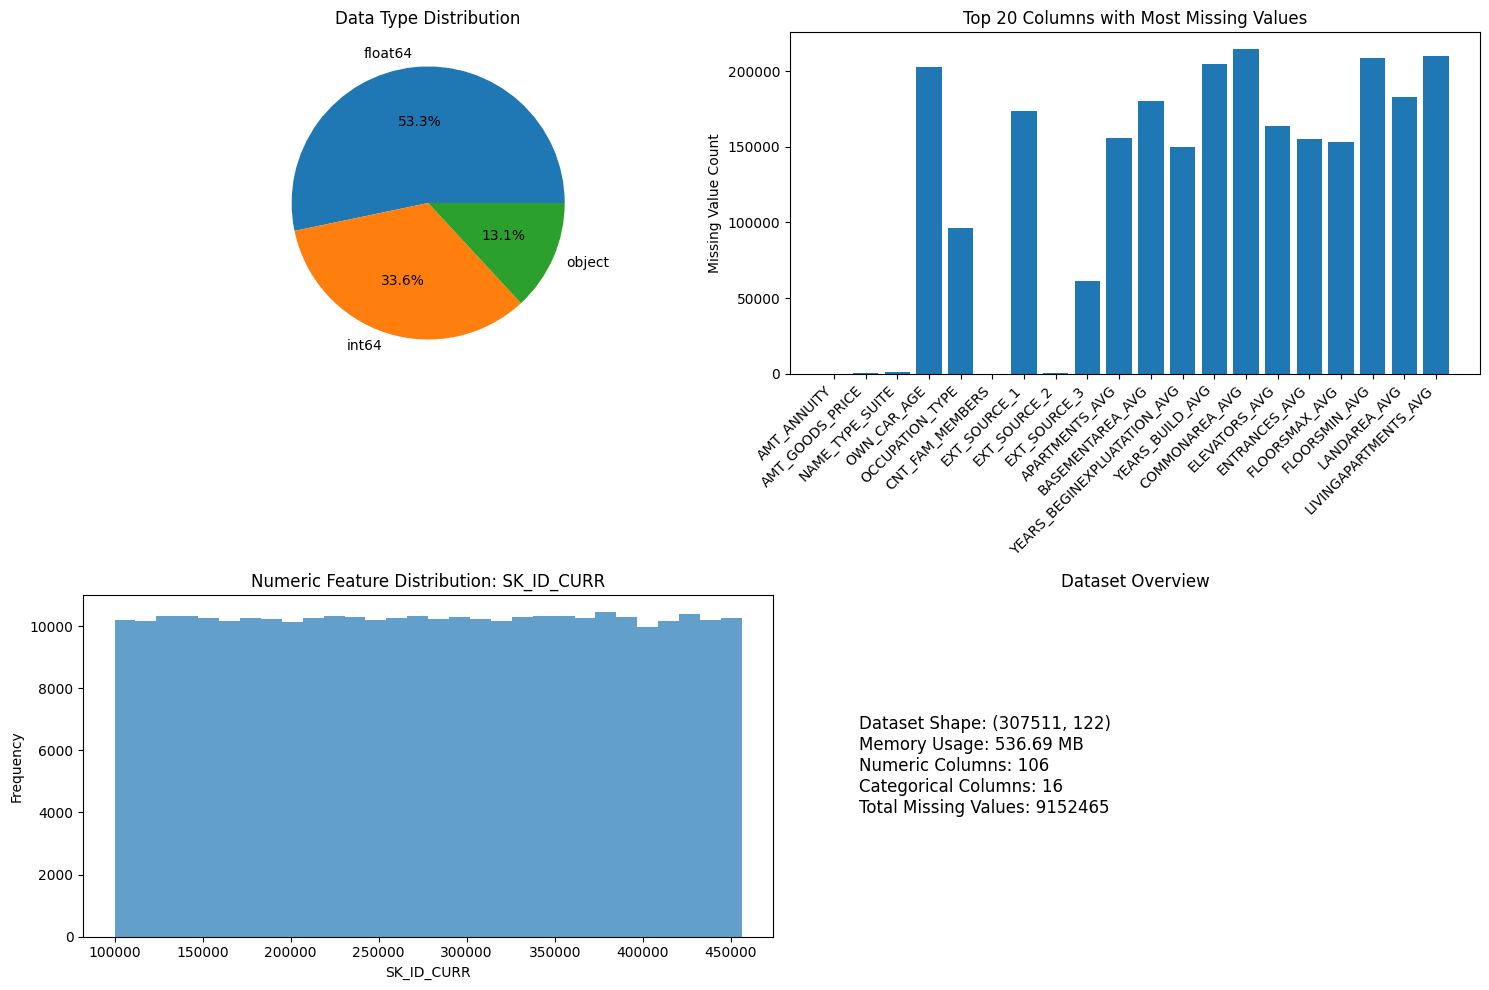

In [5]:
# Visualize missing values
plot_data_overview(train_df)

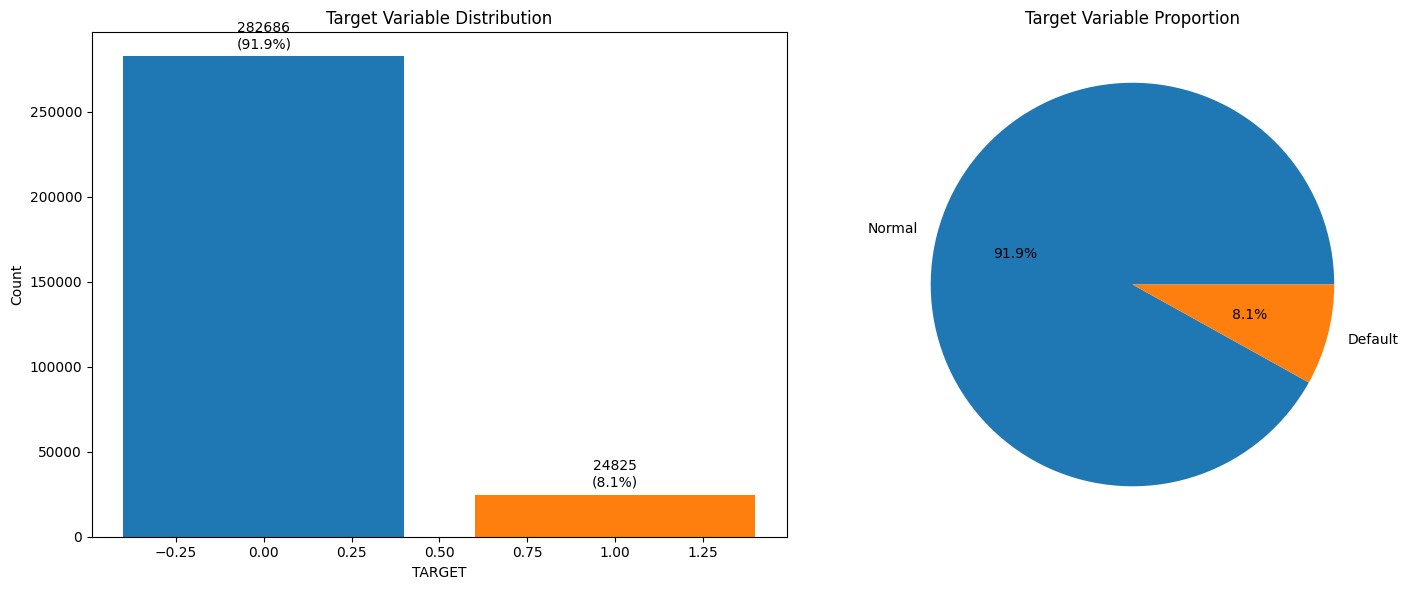

In [6]:
# reduce memory usage
visualizer = DataVisualizer()

# Target variable distribution
visualizer.plot_target_distribution(train_df, 'TARGET')

## 4. Missing value analysis

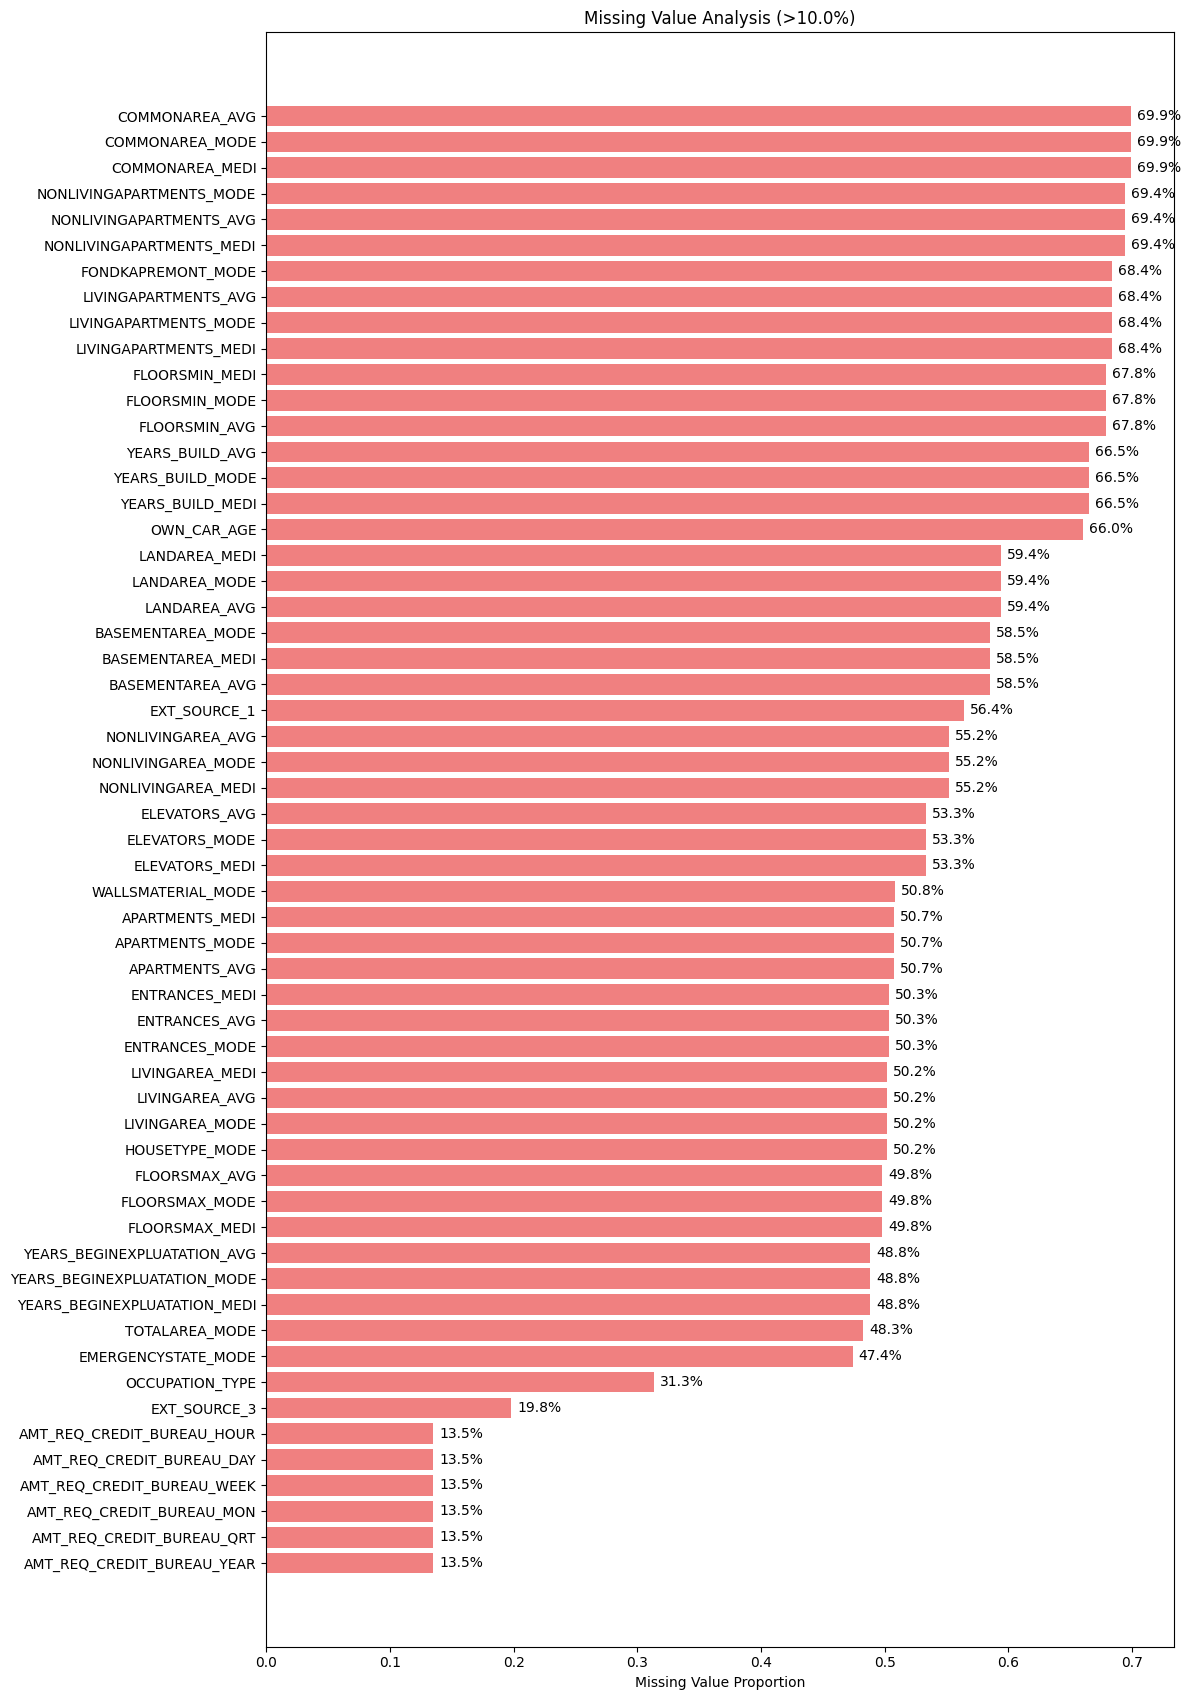

In [7]:
# Missing values
plot_missing_values(train_df, threshold=0.1)

## 5. Numerical feature analysis

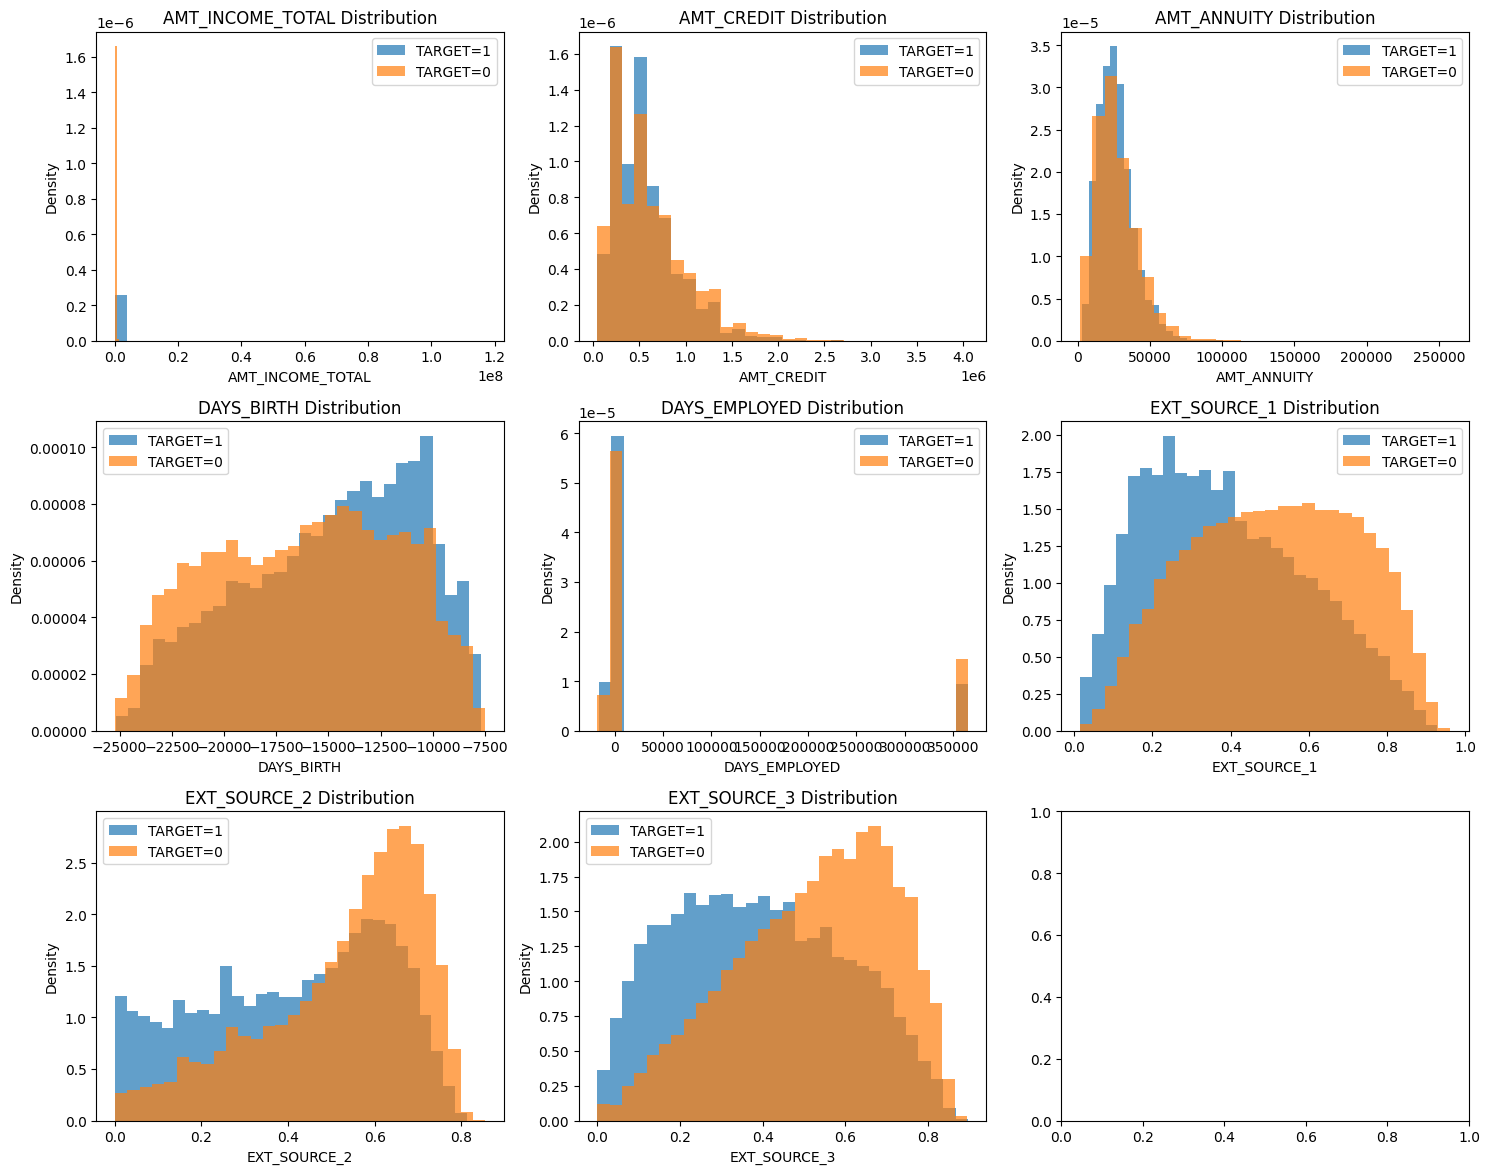

In [8]:
# 5. Numerical feature analysis
important_numeric_features = [
    'AMT_INCOME_TOTAL',
    'AMT_CREDIT', 
    'AMT_ANNUITY',
    'DAYS_BIRTH',
    'DAYS_EMPLOYED',
    'EXT_SOURCE_1',
    'EXT_SOURCE_2',
    'EXT_SOURCE_3'
]

# Numerical feature distributions and their relationship with the target variable
visualizer.plot_numerical_features(train_df, important_numeric_features, 'TARGET')

## 6.   Numerical feature analysis

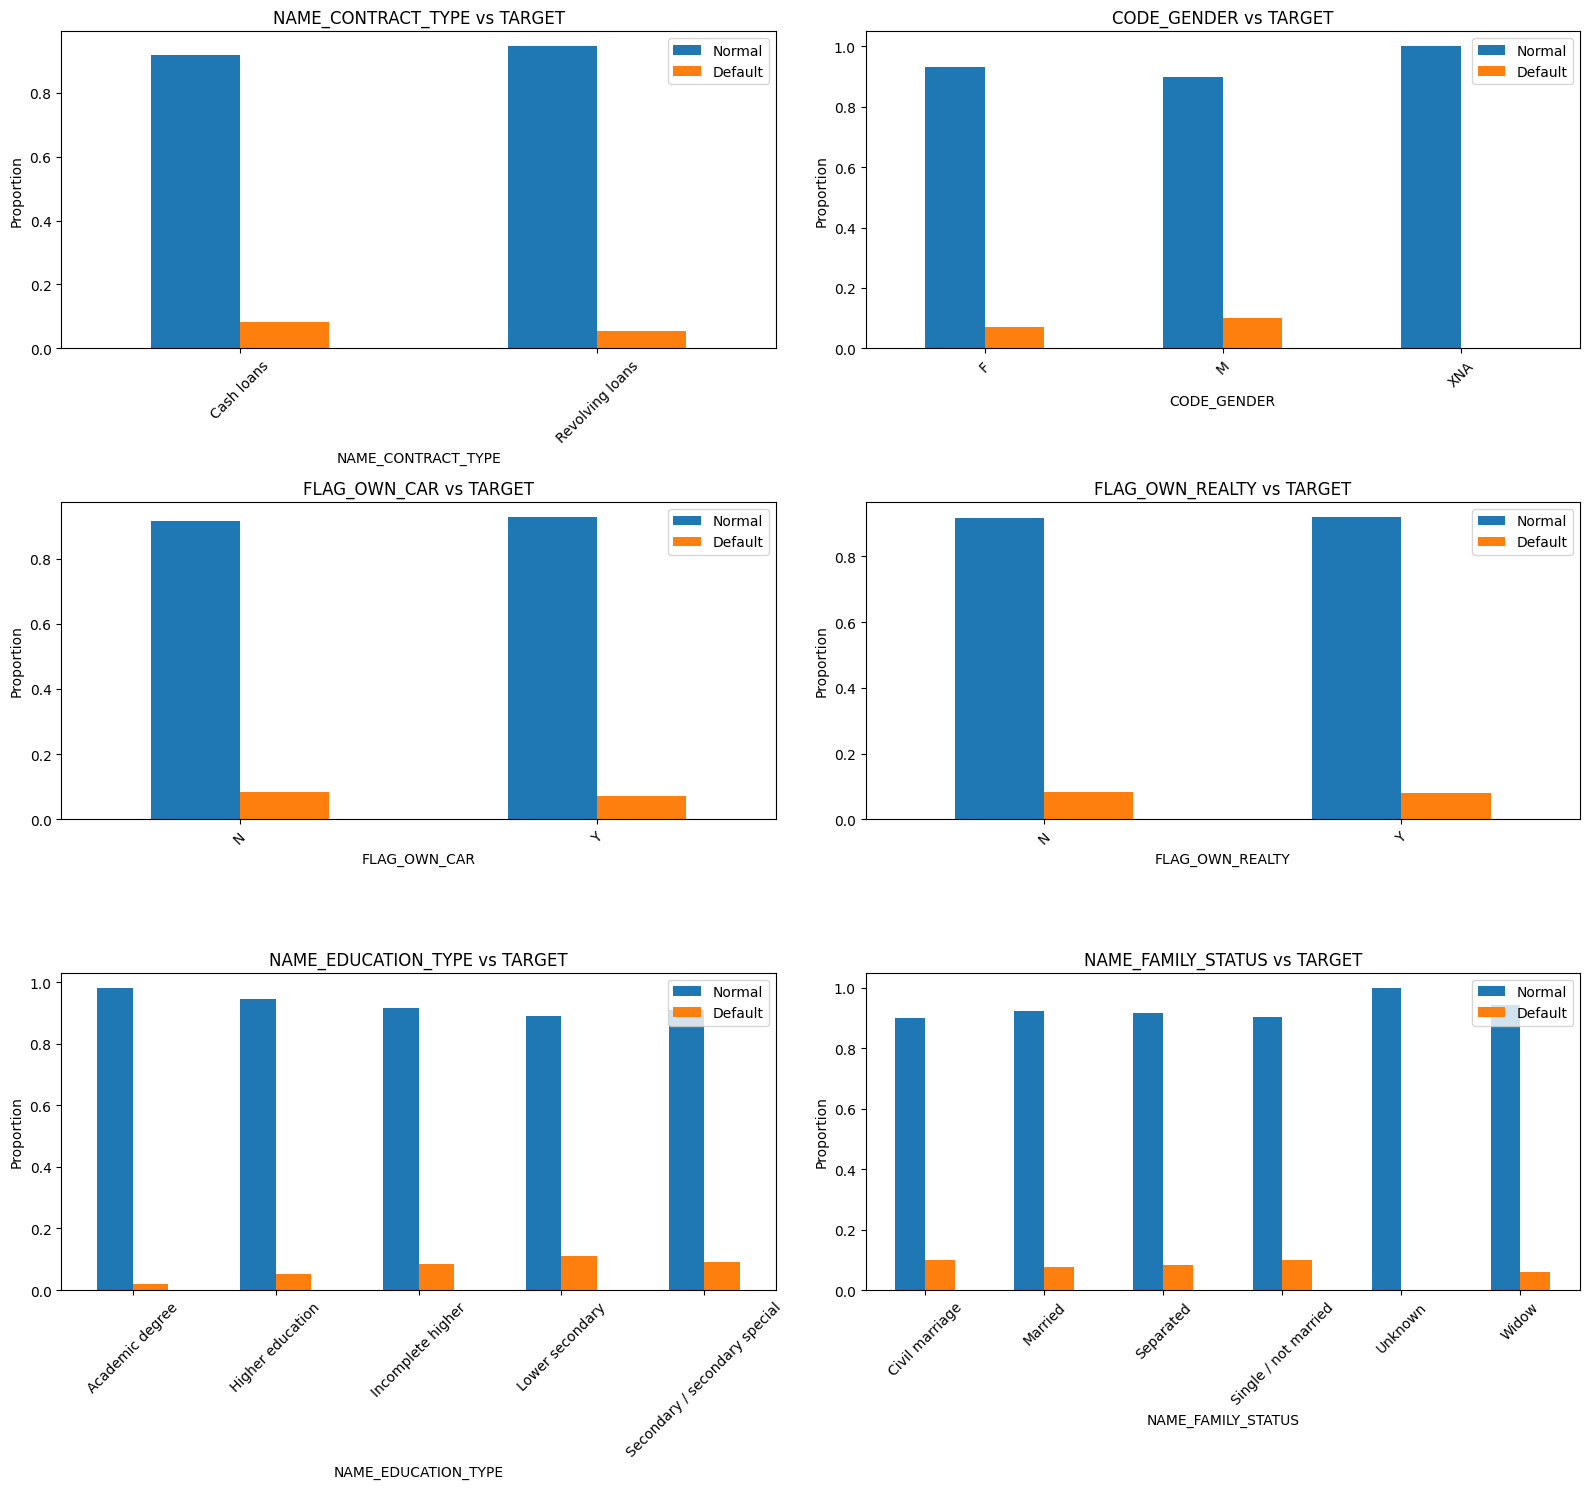

In [9]:
# 6.   Numerical feature analysis
important_categorical_features = [
    'NAME_CONTRACT_TYPE',
    'CODE_GENDER',
    'FLAG_OWN_CAR',
    'FLAG_OWN_REALTY',
    'NAME_EDUCATION_TYPE',
    'NAME_FAMILY_STATUS'
]

# Categorical feature distributions and their relationship with the target variable
visualizer.plot_categorical_features(train_df, important_categorical_features, 'TARGET')

## 7. Correlation analysis

In [10]:
# Identify all numeric features
numeric_features = train_df.select_dtypes(include=[np.number]).columns.tolist()
# Exclude identifier columns
numeric_features = [col for col in numeric_features if 'SK_ID' not in col]

# Compute correlations with the target variable
correlations = train_df[numeric_features].corrwith(train_df['TARGET']).sort_values(ascending=False)

print(" Correlations with target variable:")
print(correlations.head(10))
print("\nLowest correlations with target variable:")
print(correlations.tail(10))

 Correlations with target variable:
TARGET                         1.000000
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
dtype: float64

Lowest correlations with target variable:
ELEVATORS_AVG                -0.034199
REGION_POPULATION_RELATIVE   -0.037227
AMT_GOODS_PRICE              -0.039645
FLOORSMAX_MODE               -0.043226
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_AVG                -0.044003
DAYS_EMPLOYED                -0.044932
EXT_SOURCE_1                 -0.155317
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_3                 -0.178919
dtype: float64


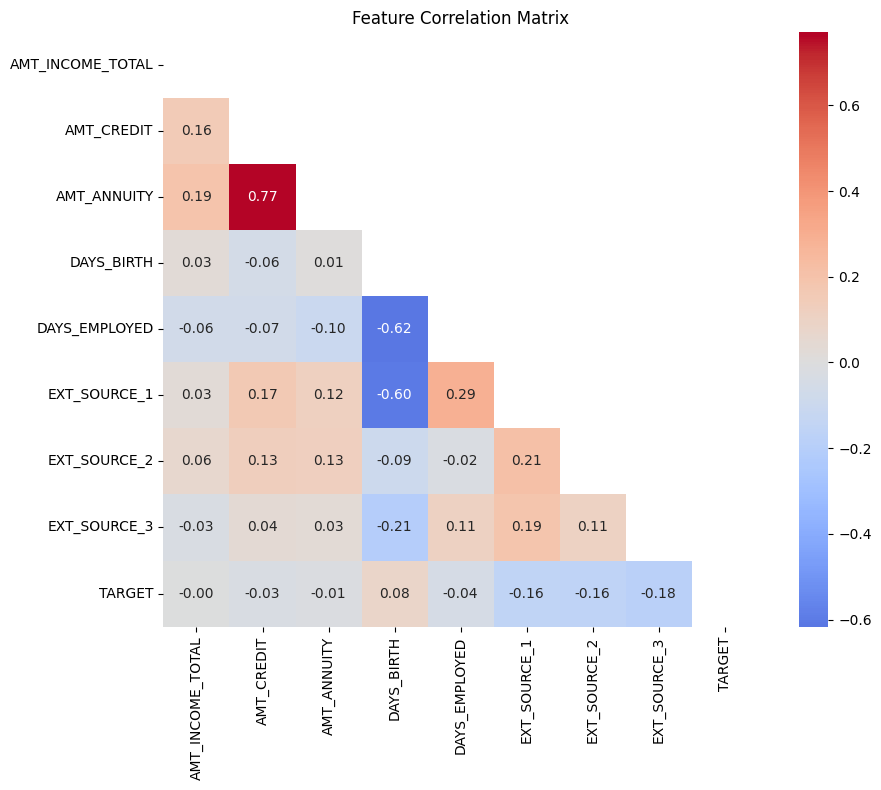

In [11]:
# Correlation matrix for important numeric features
important_features = important_numeric_features + ['TARGET']
visualizer.plot_correlation_matrix(train_df, important_features)

## 8. External rating analysis


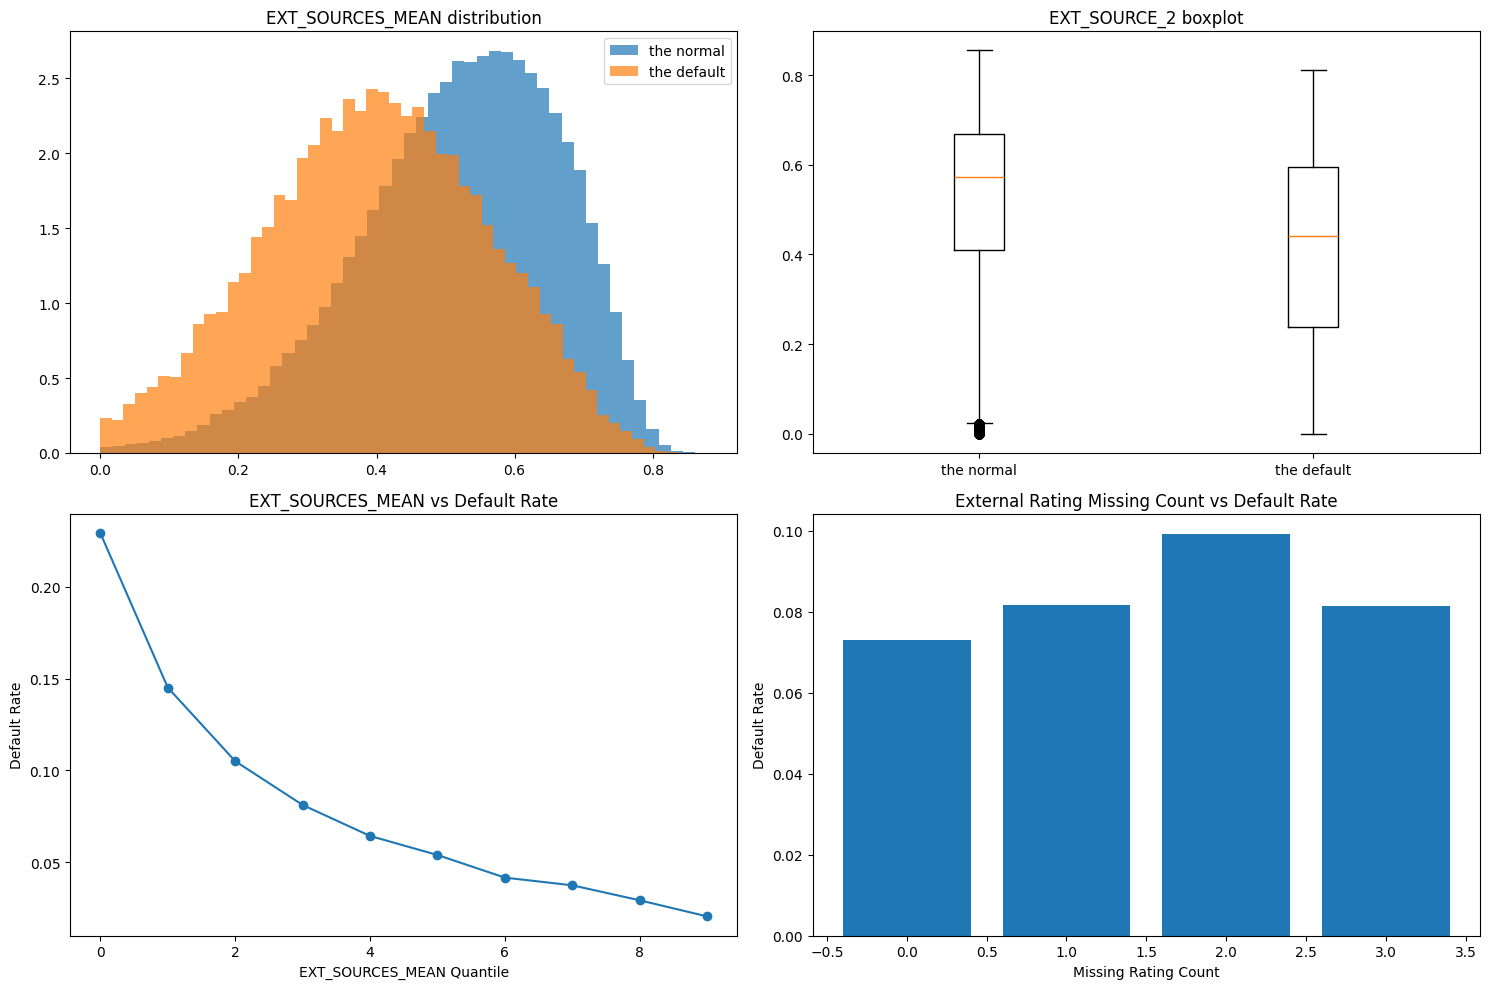

In [12]:
# 7. External rating analysis
train_analysis = train_df.copy()
train_analysis['EXT_SOURCES_MEAN'] = train_analysis[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].mean(axis=1)
train_analysis['EXT_SOURCES_STD'] = train_analysis[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].std(axis=1)

# Analyze the relationship between external ratings and the target variable
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# EXT_SOURCES_MEAN distribution
axes[0,0].hist(train_analysis[train_analysis['TARGET']==0]['EXT_SOURCES_MEAN'].dropna(), 
               alpha=0.7, label='the normal', bins=50, density=True)
axes[0,0].hist(train_analysis[train_analysis['TARGET']==1]['EXT_SOURCES_MEAN'].dropna(), 
               alpha=0.7, label='the default', bins=50, density=True)
axes[0,0].set_title('EXT_SOURCES_MEAN distribution')
axes[0,0].legend()

# EXT_SOURCE_2 vs TARGET
axes[0,1].boxplot([train_analysis[train_analysis['TARGET']==0]['EXT_SOURCE_2'].dropna(),
                  train_analysis[train_analysis['TARGET']==1]['EXT_SOURCE_2'].dropna()],
                 labels=['the normal', 'the default'])
axes[0,1].set_title('EXT_SOURCE_2 boxplot')

# Default rate vs EXT_SOURCES_MEAN bins
mean_bins = pd.qcut(train_analysis['EXT_SOURCES_MEAN'].dropna(), q=10, duplicates='drop')
default_rate_by_mean = train_analysis.groupby(mean_bins)['TARGET'].mean()
axes[1,0].plot(range(len(default_rate_by_mean)), default_rate_by_mean.values, 'o-')
axes[1,0].set_title('EXT_SOURCES_MEAN vs Default Rate')
axes[1,0].set_xlabel('EXT_SOURCES_MEAN Quantile')
axes[1,0].set_ylabel('Default Rate')

# External rating missing value analysis
ext_missing = train_analysis[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'TARGET']].copy()
ext_missing['missing_count'] = ext_missing[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].isnull().sum(axis=1)
missing_default_rate = ext_missing.groupby('missing_count')['TARGET'].mean()
axes[1,1].bar(missing_default_rate.index, missing_default_rate.values)
axes[1,1].set_title('External Rating Missing Count vs Default Rate')
axes[1,1].set_xlabel('Missing Rating Count')
axes[1,1].set_ylabel('Default Rate')

plt.tight_layout()
plt.show()

## 9. Overview of other data tables

In [13]:
# 8. External rating analysis
# Analyze the 'bureau' dataset for credit history insights
if 'bureau' in datasets and datasets['bureau'] is not None:
    bureau_df = datasets['bureau']
    print("the bureau dataset:")
    print(f"Shape: {bureau_df.shape}")
    print(f"\nCredit Status Distribution:")
    print(bureau_df['CREDIT_ACTIVE'].value_counts())

    # Number of credits for each client
    credit_counts = bureau_df.groupby('SK_ID_CURR').size()
    print(f"\nAverage number of credits per client: {credit_counts.mean():.2f}")
    print(f"Maximum number of credits: {credit_counts.max()}")

the bureau dataset:
Shape: (1716428, 17)

Credit Status Distribution:
CREDIT_ACTIVE
Closed      1079273
Active       630607
Sold           6527
Bad debt         21
Name: count, dtype: int64

Average number of credits per client: 5.61
Maximum number of credits: 116


In [14]:
# Analyze the 'previous_application' dataset for historical application insights
if 'previous_application' in datasets and datasets['previous_application'] is not None:
    prev_app_df = datasets['previous_application']
    print("the previous_application dataset:")
    print(f"Shape: {prev_app_df.shape}")
    print(f"\nApplication Status Distribution:")
    print(prev_app_df['NAME_CONTRACT_STATUS'].value_counts())

    # Approval rate
    approval_rate = (prev_app_df['NAME_CONTRACT_STATUS'] == 'Approved').mean()
    print(f"\nHistorical Application Approval Rate: {approval_rate:.4f}")

the previous_application dataset:
Shape: (1670214, 37)

Application Status Distribution:
NAME_CONTRACT_STATUS
Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: count, dtype: int64

Historical Application Approval Rate: 0.6207


## 10. Key Findings Summary
Data Characteristics

The training set contains 307,511 samples and 122 features

The target variable is imbalanced, with a default rate of about 8%

The dataset contains many missing values, which need to be handled carefully

Important Features

External Scores: EXT_SOURCE_1/2/3 are the most important features

Income-related: AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY

Demographics: Age, education level, family status

Business Insights

Higher external scores are associated with lower default risk

Age is negatively correlated with default risk

The ratio of income to credit amount is an important indicator

Next Steps

Feature engineering: create ratio features and aggregated features

Handle missing values and outliers

Feature selection and dimensionality reduction

Model training and evaluation